# Project 4 - College Majors and Clustering

In [1]:

# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering



In [2]:
df = pd.read_csv('data/all-ages.csv')
print(df)

     Major_code                                            Major  \
0          1100                              GENERAL AGRICULTURE   
1          1101            AGRICULTURE PRODUCTION AND MANAGEMENT   
2          1102                           AGRICULTURAL ECONOMICS   
3          1103                                  ANIMAL SCIENCES   
4          1104                                     FOOD SCIENCE   
..          ...                                              ...   
168        6211                           HOSPITALITY MANAGEMENT   
169        6212    MANAGEMENT INFORMATION SYSTEMS AND STATISTICS   
170        6299  MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION   
171        6402                                          HISTORY   
172        6403                            UNITED STATES HISTORY   

                      Major_category   Total  Employed  \
0    Agriculture & Natural Resources  128148     90245   
1    Agriculture & Natural Resources   95326     76865   
2    Agri

## Data Preparation and Preprocessing

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

features = ["Employed", "Unemployed", "Total", "Employed_full_time_year_round", "Median", "P25th", "P75th"]

df_cluster = df[features].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

df_scaled = pd.DataFrame(scaled_data, columns=features)

df_cluster.head()

Missing values in each column:
Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64


,Employed,Unemployed,Total,Employed_full_time_year_round,Median,P25th,P75th
0,90245,2423,128148,74078,50000,34000,80000.0
1,76865,2266,95326,64240,54000,36000,80000.0
2,26321,821,33955,22810,63000,40000,98000.0
3,81177,3619,103549,64937,46000,30000,72000.0
4,17281,894,24280,12722,62000,38500,90000.0


# Clustering

# The Data



# Data Understanding and Visualization


<Figure size 1200x800 with 0 Axes>

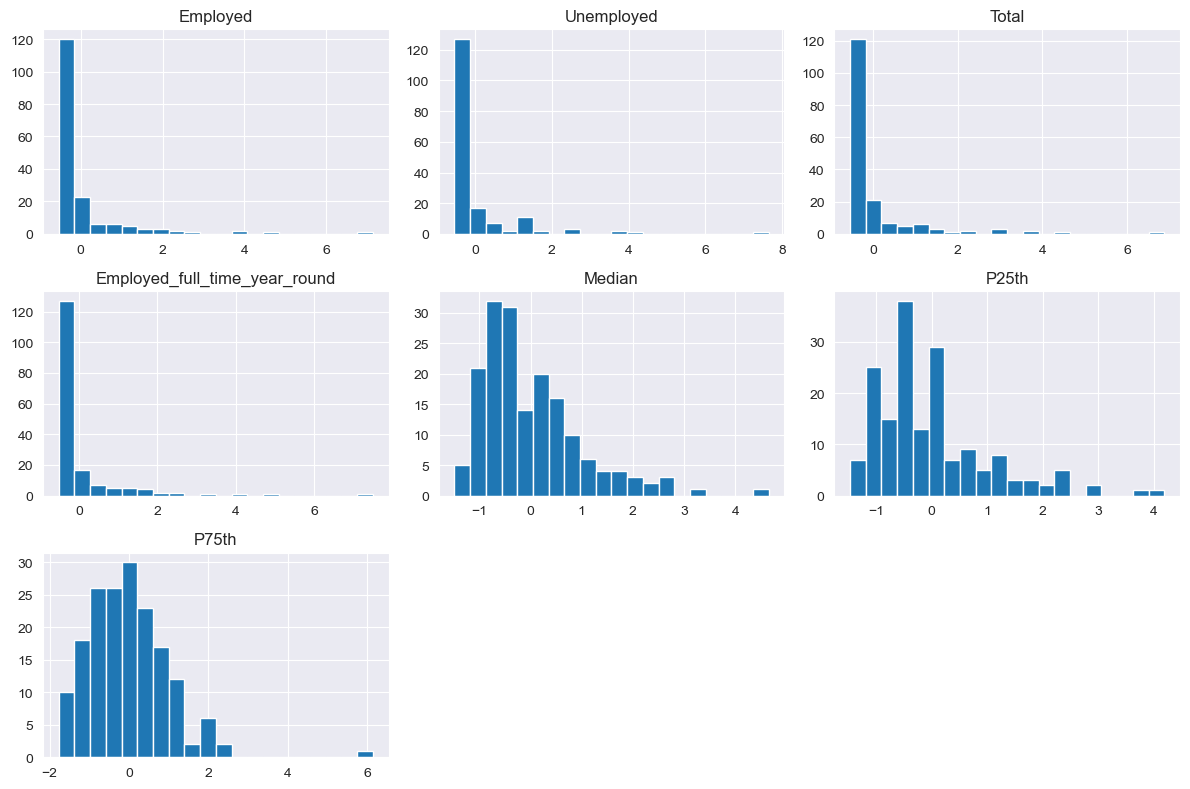

In [4]:
plt.figure(figsize=(12, 8))
df_scaled.hist(bins=20, figsize=(12, 8), layout=(3, 3))
plt.tight_layout()
plt.show()

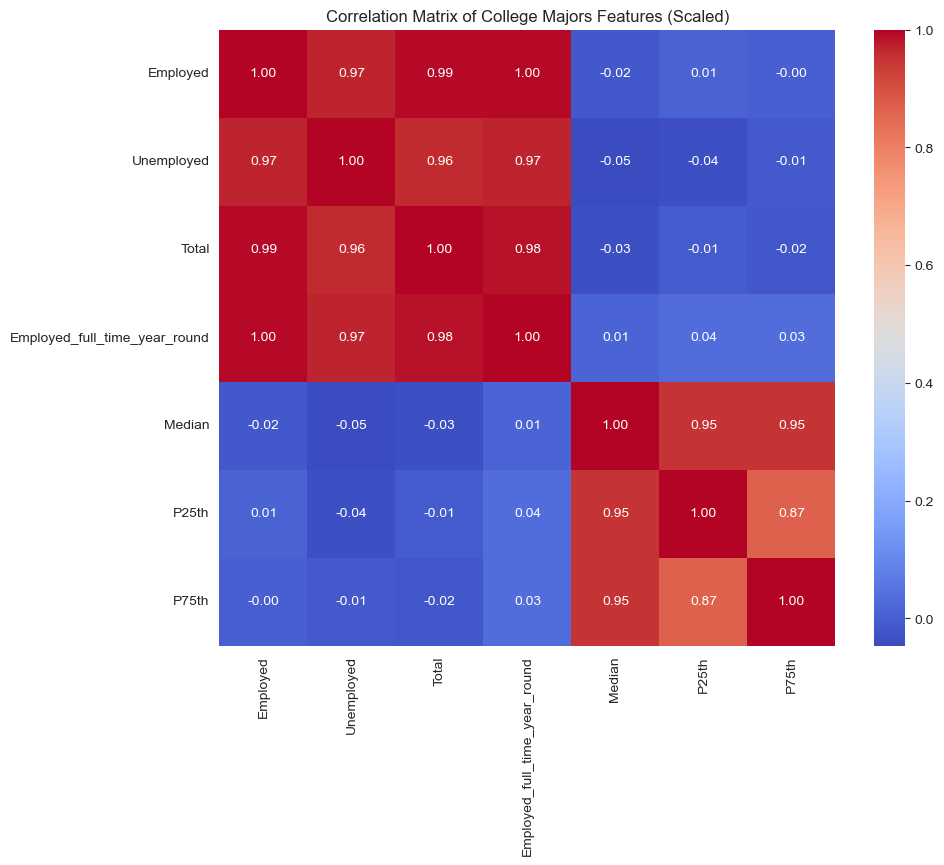

In [5]:
corr_matrix = df_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of College Majors Features (Scaled)")
plt.show()

In [6]:
sse = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

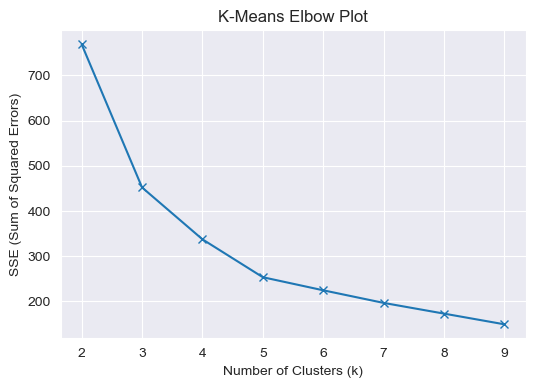

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(K_range, sse, marker='x')
plt.title("K-Means Elbow Plot")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.show()

In [8]:
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)


kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print(f"K-Means Silhouette Score (k={k_opt}): {kmeans_silhouette:.3f}")

df_cluster['KMeans_Cluster'] = kmeans_labels

K-Means Silhouette Score (k=4): 0.499


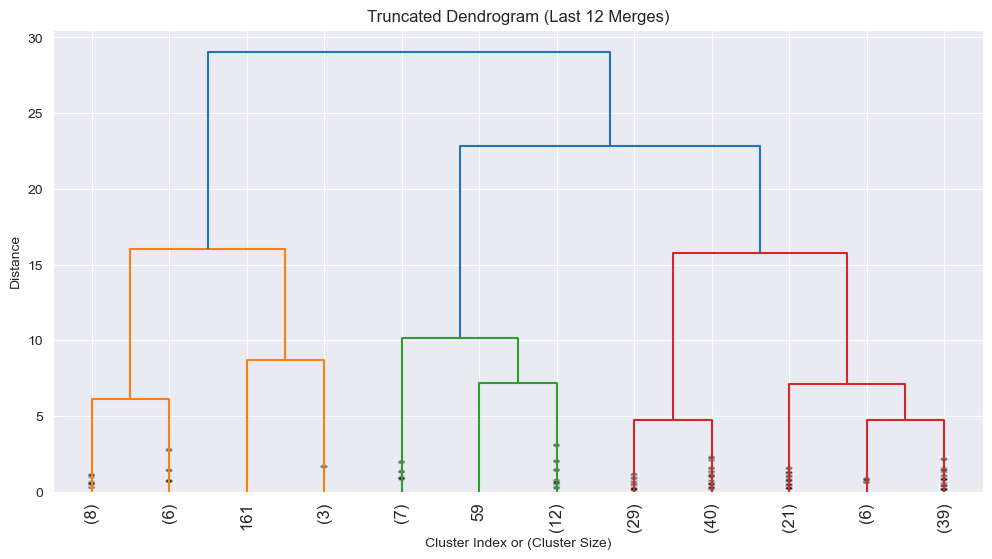

In [9]:

plt.figure(figsize=(12, 6))
shc.dendrogram(
    shc.linkage(df_scaled, method='ward'),
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True
)
plt.title("Truncated Dendrogram (Last 12 Merges)")
plt.xlabel("Cluster Index or (Cluster Size)")
plt.ylabel("Distance")
plt.show()

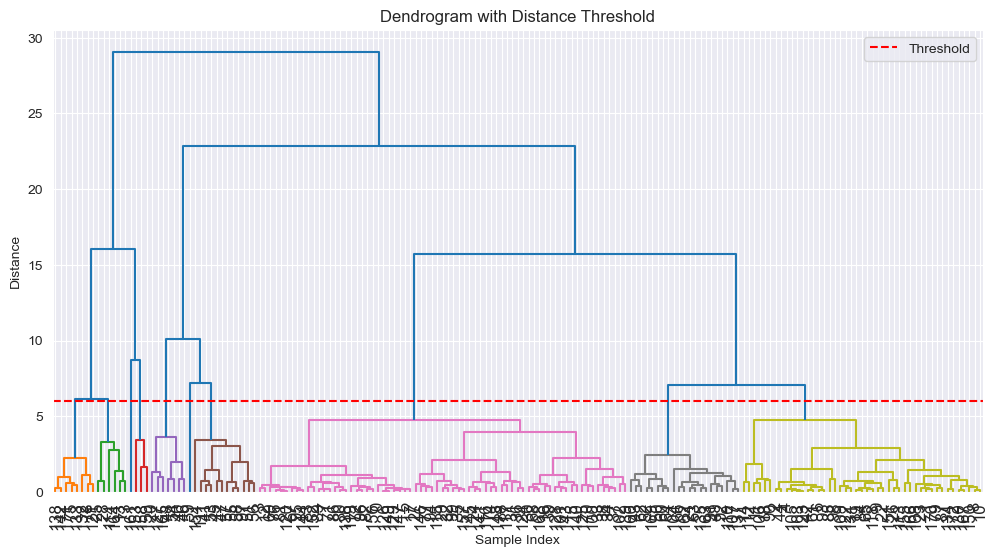

In [10]:
plt.figure(figsize=(12, 6))
ddata = shc.linkage(df_scaled, method='ward')
shc.dendrogram(
    ddata,
    color_threshold=6,  # adjust this value based on your data
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True
)
plt.axhline(y=6, color='r', linestyle='--', label="Threshold")
plt.title("Dendrogram with Distance Threshold")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.legend()
plt.show()

Explained Variance Ratio: PC1 = 56.3%, PC2 = 40.7%


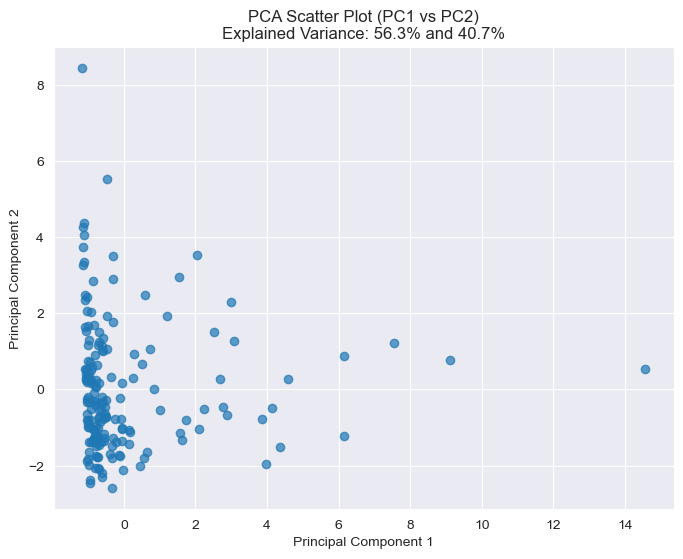

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Print explained variance ratio for each component
print(f"Explained Variance Ratio: PC1 = {pca.explained_variance_ratio_[0]*100:.1f}%, PC2 = {pca.explained_variance_ratio_[1]*100:.1f}%")

# Plot the PCA scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title(f"PCA Scatter Plot (PC1 vs PC2)\nExplained Variance: {pca.explained_variance_ratio_[0]*100:.1f}% and {pca.explained_variance_ratio_[1]*100:.1f}%")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()